In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score



# 1. Load the Data and read the column description and ensure you understand each attribute well

Attribute Information:

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [5]:
df = pd.read_csv("Parkinson-disease-data-updated",index_col=0)

# EDA

In [6]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
df.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, kind="scatter", diag_kind = 'kde')
plt.show()

<Figure size 5750x5750 with 552 Axes>

In [11]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


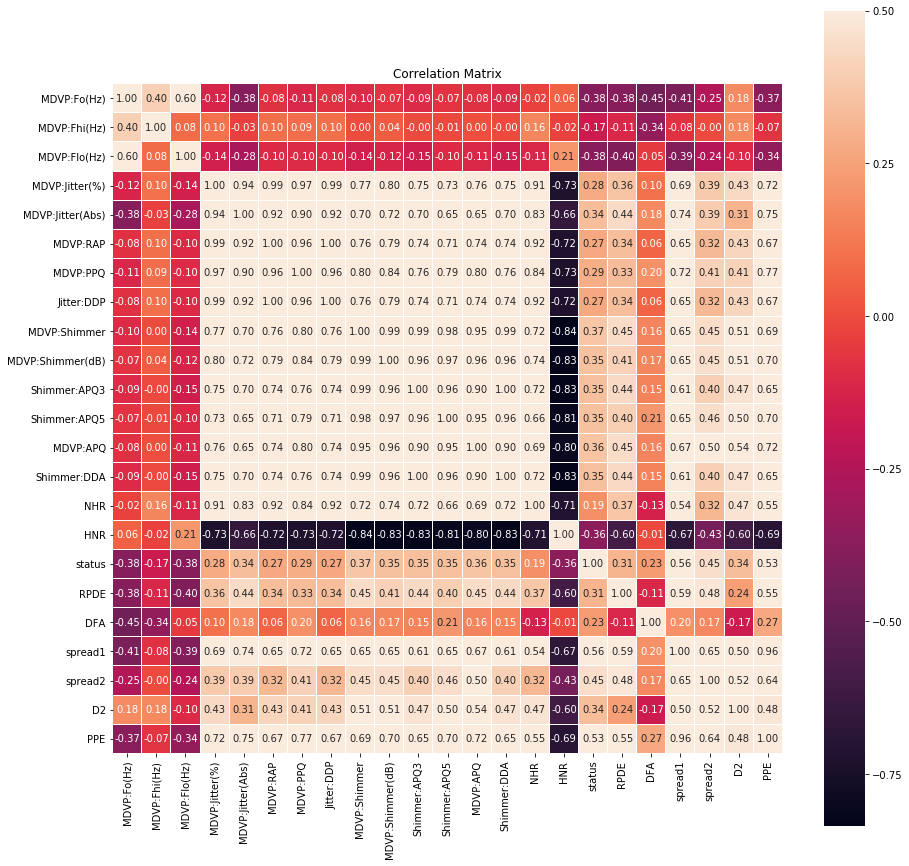

In [12]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), vmax=.5, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation Matrix')
plt.show()

Inference: 

Dependent Variables : 
MDVP Fo(Hz), MDVP Fhi(Hz), MDVP Flo (Hz) have negative correlation with the dependent variable. 
Other variables donot show much correlation either with the Target variable - Status.

Independent Variables : MDVP Fo(Hz), MDVP Fhi(Hz), MDVP Flo (Hz), MDVP Jitter (%), MDVP Flo (Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP Shimmer (dB), Shimmer APQ3, Shimmer: APQ5, MDVP: APQ, Shimmer DDA, NHR all have high correlation amongst them.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

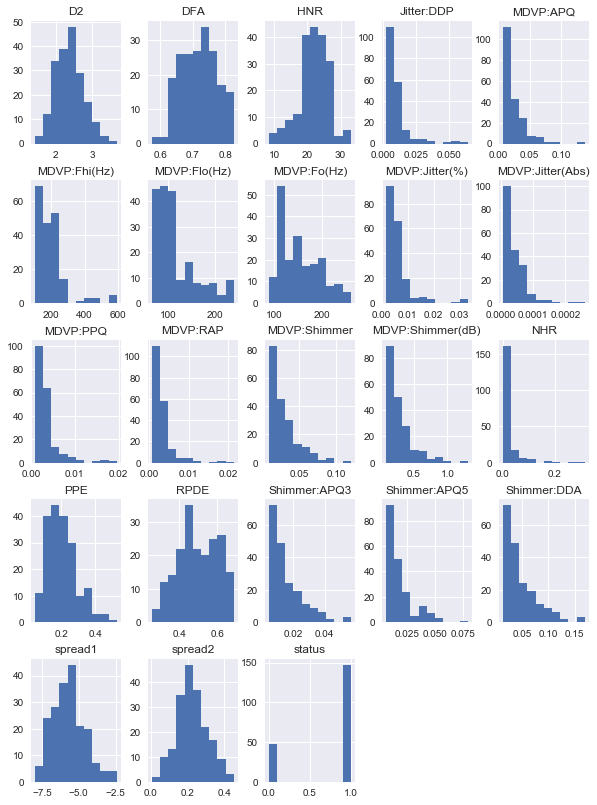

In [14]:
hist = df.hist(figsize=(10, 14))

# Bivariate Analysis

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: spread1, dtype: object

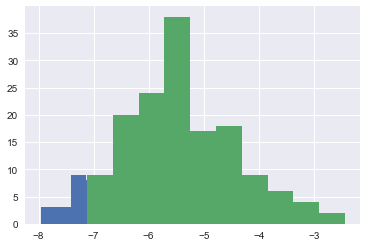

In [15]:
df.groupby('status').spread1.hist()

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: spread2, dtype: object

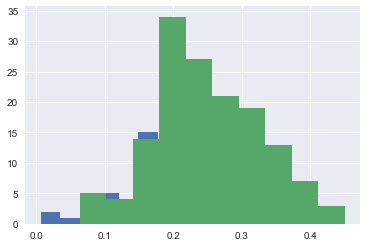

In [16]:
df.groupby('status').spread2.hist()

status
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PPE, dtype: object

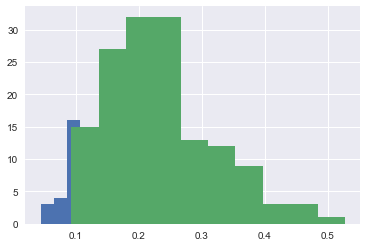

In [17]:
df.groupby('status').PPE.hist()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


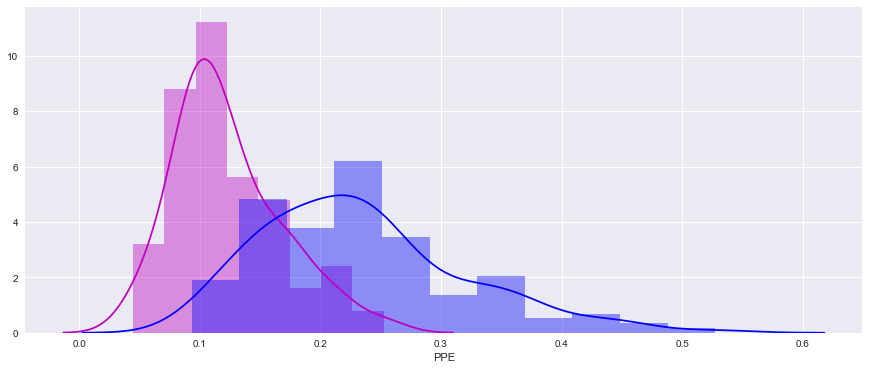

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['PPE'], color = 'm')
sns.distplot( df[df['status'] == 1]['PPE'], color = 'b')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


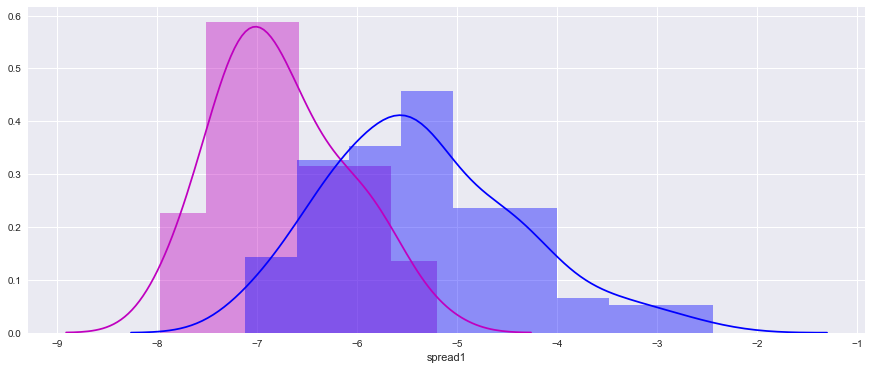

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['spread1'], color = 'm')
sns.distplot( df[df['status'] == 1]['spread1'], color = 'b')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


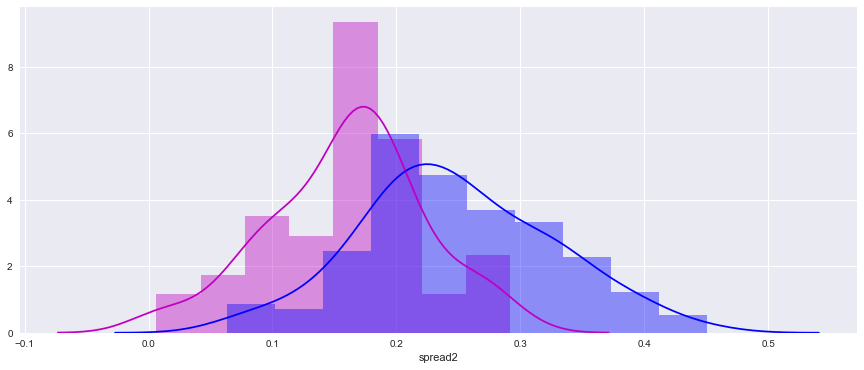

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['spread2'], color = 'm')
sns.distplot( df[df['status'] == 1]['spread2'], color = 'b')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


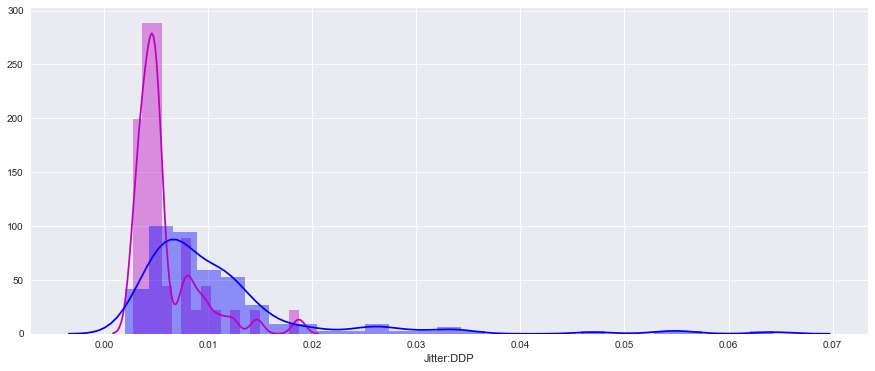

In [23]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 6))
sns.distplot( df[df['status'] == 0]['Jitter:DDP'], color = 'm')
sns.distplot( df[df['status'] == 1]['Jitter:DDP'], color = 'b')

Inference: Data is not a Gaussian distribution and is highly skewed.

In [24]:
df1 = df.copy()
df1.drop('name',axis=1, inplace=True)
df1.shape

(195, 23)

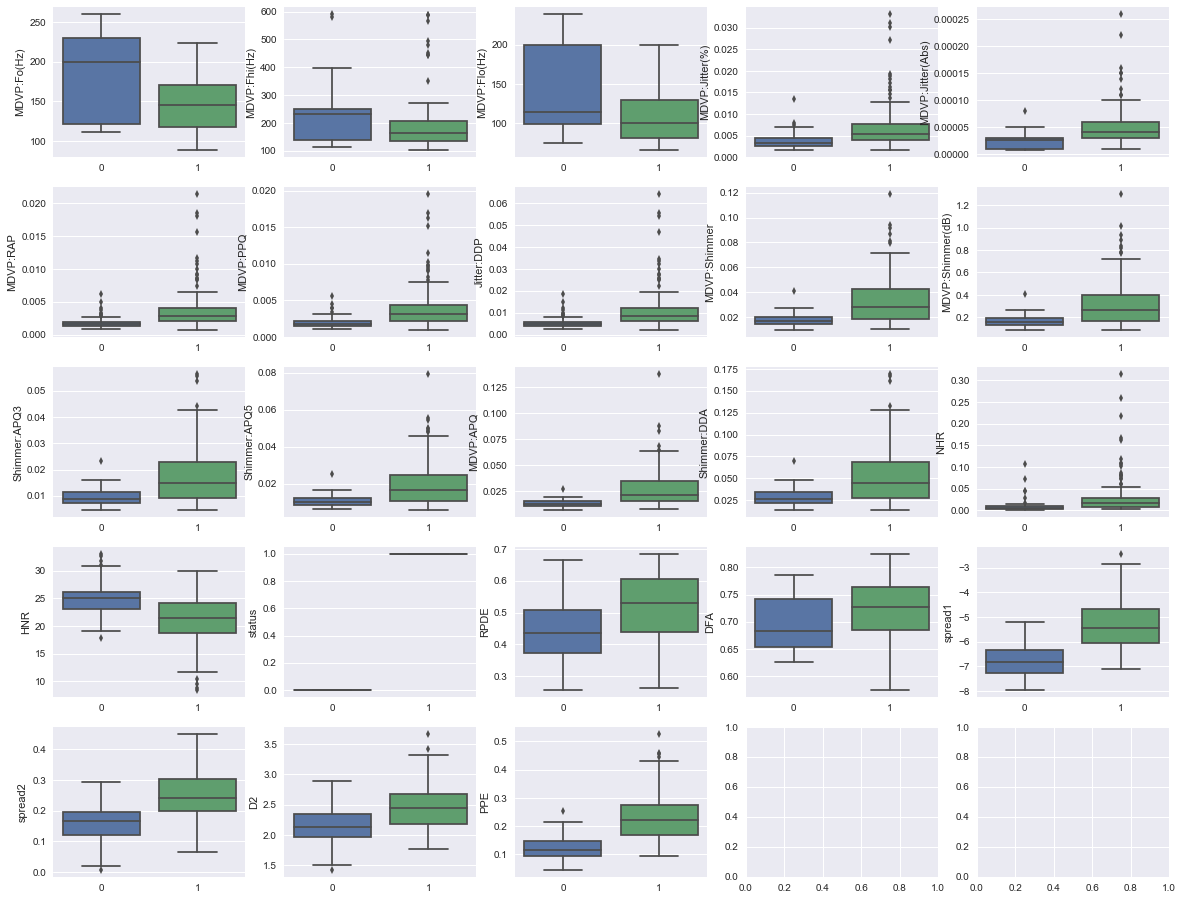

In [25]:
fig, axes = plt.subplots(nrows = 5, ncols = 5,figsize=(20,16))
for i,feat in enumerate(df1.columns):
    ax = axes[int(i/5),i%5]
    sns.boxplot(x='status',y=feat,data=df1,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)

### Outlier Treatment

In [26]:
def checkOutlier(df, col):
    
    # Calculating mean and Standard deviation for the field
    mn = df[col].mean()
    std = df[col].std()
    # Calculating lower and upper cut-off
    lowerLimit = mn - (3*std)
    upperLimit = mn + (3*std)
    
    print ("Outlier Check for:",col)
    print ('Lower cut-off (mean - 3std): ', lowerLimit)
    print ('Upper cut-off (mean + 3std): ', upperLimit)
    print ('Number of records below lower cut-off: ', df[df[col]<lowerLimit].shape[0])
    print ('Number of records above upper cut-off: ', df[df[col]>upperLimit].shape[0])
    print ('Applying flooring and capping to values outside cut-off values\n')
    df.loc[df[col] < lowerLimit, col] = lowerLimit
    df.loc[df[col] > upperLimit, col] = upperLimit
    print ('Number of records below lower cut-off: ', df[df[col]<lowerLimit].shape[0])
    print ('Number of records above upper cut-off: ', df[df[col]>upperLimit].shape[0])
    print ('***************************************************************************')
    
    return df

In [27]:
colsFeatures = df1.columns.tolist()
colsFeatures.remove('status')

for col in colsFeatures:
    dfData = checkOutlier(df1,col)

Outlier Check for: MDVP:Fo(Hz)
Lower cut-off (mean - 3std):  30.058446778426656
Upper cut-off (mean + 3std):  278.3988352728554
Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
Applying flooring and capping to values outside cut-off values

Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
***************************************************************************
Outlier Check for: MDVP:Fhi(Hz)
Lower cut-off (mean - 3std):  -77.36972495637306
Upper cut-off (mean + 3std):  471.5795608538091
Number of records below lower cut-off:  0
Number of records above upper cut-off:  7
Applying flooring and capping to values outside cut-off values

Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
***************************************************************************
Outlier Check for: MDVP:Flo(Hz)
Lower cut-off (mean - 3std):  -14.239608776750146
Upper cut-off (mean + 3std):  246.88887031521

Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
***************************************************************************
Outlier Check for: spread2
Lower cut-off (mean - 3std):  -0.023706939143244676
Upper cut-off (mean + 3std):  0.4767276365791418
Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
Applying flooring and capping to values outside cut-off values

Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
***************************************************************************
Outlier Check for: D2
Lower cut-off (mean - 3std):  1.2334289475411375
Upper cut-off (mean + 3std):  3.5302232268178373
Number of records below lower cut-off:  0
Number of records above upper cut-off:  1
Applying flooring and capping to values outside cut-off values

Number of records below lower cut-off:  0
Number of records above upper cut-off:  0
****************************************************

# Boxplotting after outlier treatment

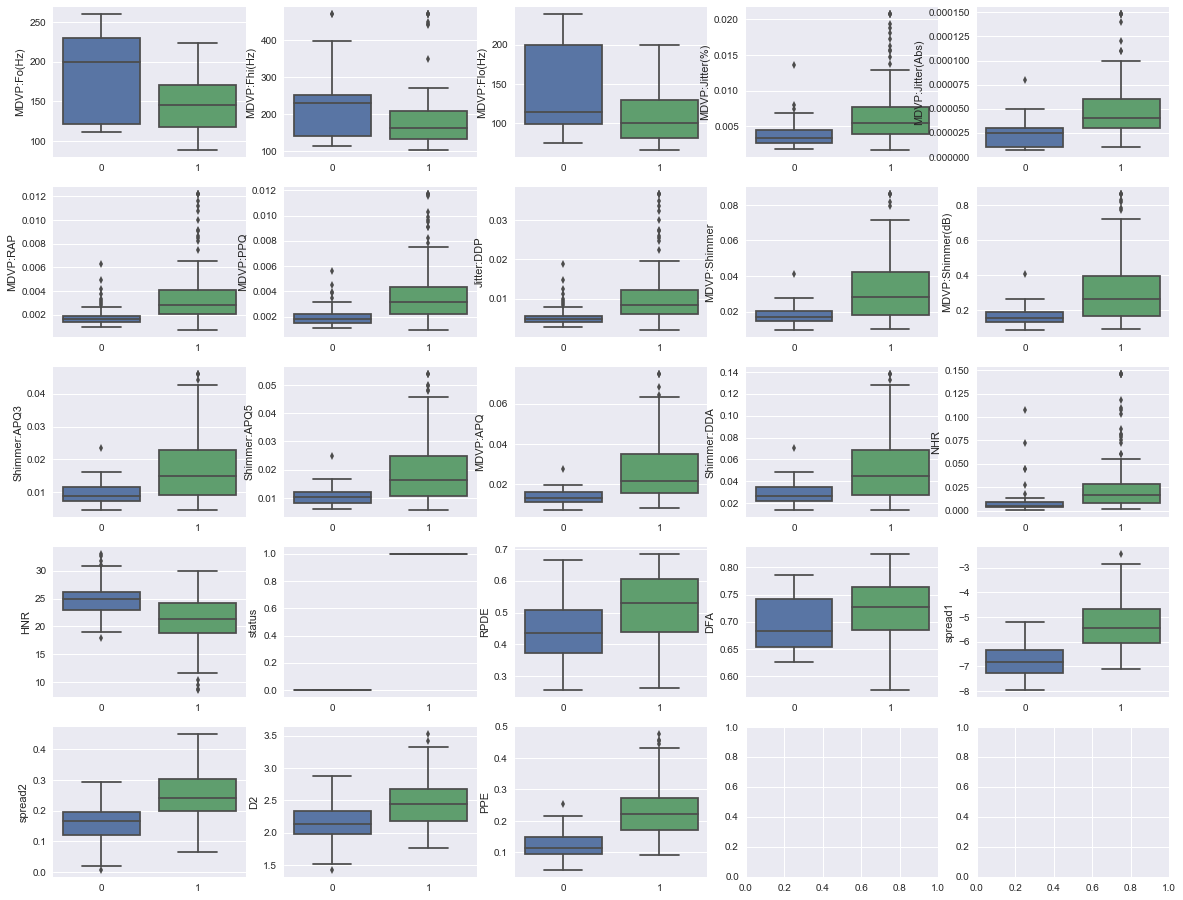

In [28]:
fig, axes = plt.subplots(nrows = 5, ncols = 5,figsize=(20,16))
for i,feat in enumerate(df1.columns):
    ax = axes[int(i/5),i%5]
    sns.boxplot(x='status',y=feat,data=df1,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)

# 2. Split the data into training and test set in the ratio of 70:30 respectively

In [29]:
#We have dropped few columns as they are highly correlated with other columns 
df2 = df1.drop(['Jitter:DDP','MDVP:RAP','MDVP:Jitter(%)','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA','spread1'],axis=1)

In [30]:
df2.shape

(195, 15)

#### As we have seen - data is skewed, hence we would need to do preprocessing of data. 
In our case we will use Scalar - Min Max
The motivation to use this scaling includes robustness to very small standard deviations of features and preserving zero entries in sparse data.

**Note** : Scalar Min Max is very sensitive to outliers. Hence we have done the outlier treatment above.

In [31]:
### MODEL FOR DROPPED VALUES
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

df2 = df2.copy()
yss = df2.status

df3 = df2.copy()
df3 = df3.drop(['status'], axis=1)
df4 = df3.copy()

Xss = df3.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(Xss)

In [32]:

df2.shape

(195, 15)

In [33]:
Xss_train, Xss_test, yss_train, yss_test = cross_validation.train_test_split(Xss, yss, train_size=0.7, test_size=0.3, random_state=42)

# 3. Classification algorithms and compare the models to find the best model

# Create a Decision Tree for Visualization

In [34]:
dt_model_1 = DecisionTreeClassifier(criterion = 'entropy' )

In [35]:
dt_model_1.fit(Xss_train, yss_train)

accuracy_score5 = dt_model_1.score(Xss_test , yss_test)      # performance on test data
print(accuracy_score5)
yss_Predict_1 = dt_model_1.predict(Xss_test)
print(metrics.confusion_matrix(yss_test, yss_Predict_1))
print(metrics.classification_report(yss_test,yss_Predict_1))

0.8305084745762712
[[10  5]
 [ 5 39]]
             precision    recall  f1-score   support

          0       0.67      0.67      0.67        15
          1       0.89      0.89      0.89        44

avg / total       0.83      0.83      0.83        59



In [36]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

PD_Tree_File = open('PD_Tree.dot','w')
dot_data = tree.export_graphviz(dt_model_1, out_file=PD_Tree_File, feature_names = list(df4))

PD_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

In [37]:
print (pd.DataFrame(dt_model_1.feature_importances_, columns = ["Imp"], index = df4.columns))



                       Imp
MDVP:Fo(Hz)       0.367862
MDVP:Fhi(Hz)      0.088666
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:PPQ          0.000000
MDVP:Shimmer      0.000000
MDVP:APQ          0.170075
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread2           0.000000
D2                0.073632
PPE               0.299765


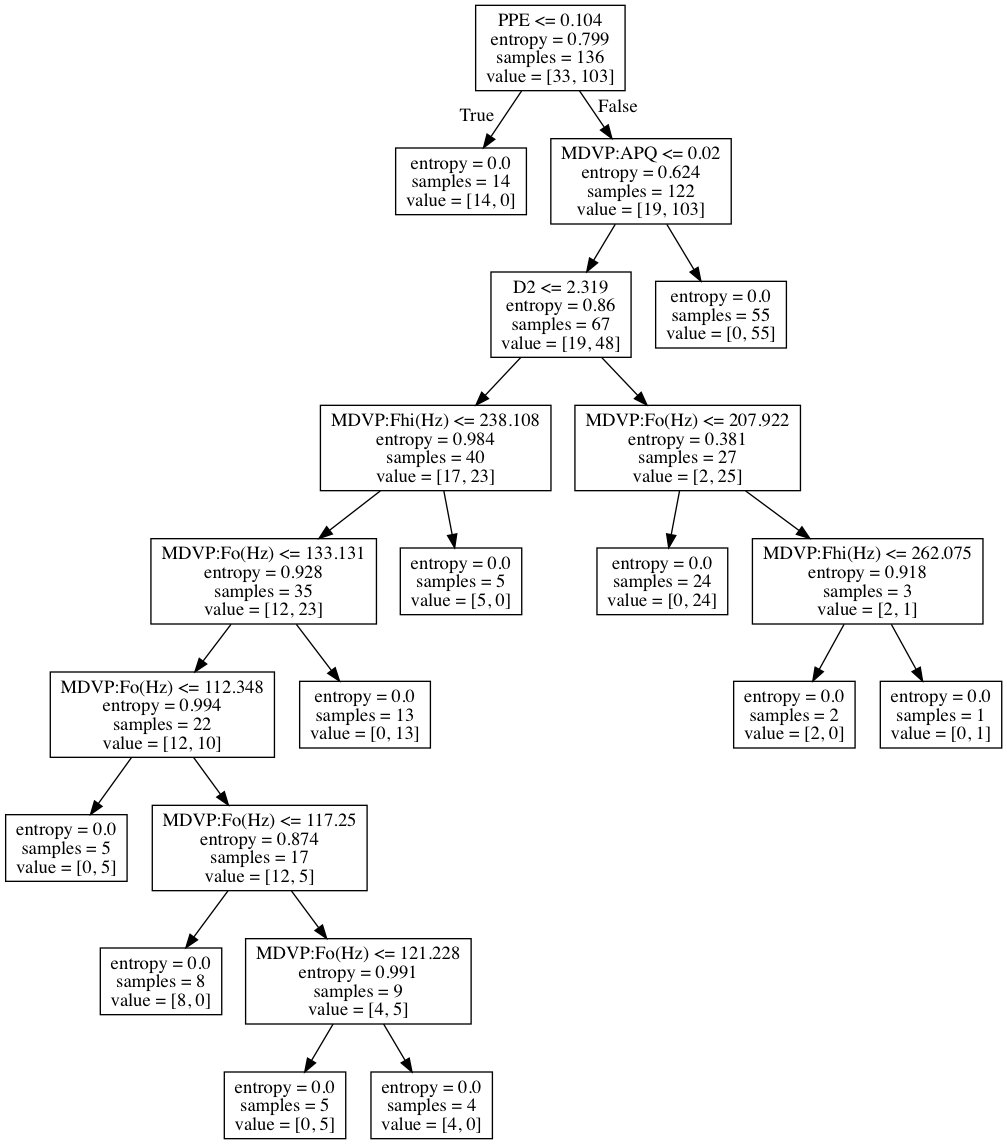

In [38]:
system("dot -Tpng PD_Tree.dot -o PD_Tree.png")   # This command is to the OS
Image("PD_Tree.png")        # use the image command to read the .png file and print on screen  # use the image command to read the .png file and print on screen

In [39]:
import time
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2']
}

    
dict_classifiers = {
    
    ### BAGGING 
    "CART1 - Decision Tree" : DecisionTreeClassifier(criterion = 'entropy', max_depth=5,random_state=42),
    "CART2 - Decision Tree": DecisionTreeClassifier(criterion = 'entropy', max_depth = 10,random_state=42),
    "Random Forest Est 15": RandomForestClassifier(n_estimators = 15,random_state=42),
    "Random Forest Est 25": RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=25, oob_score = False, random_state=42),
    "GridSearchCV": GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='precision'),
    "Bagging+KNN N=3": BaggingClassifier(KNeighborsClassifier(n_neighbors =3),max_samples=0.5, max_features=0.5,random_state=42),
    "Bagging+KNN N=7": BaggingClassifier(KNeighborsClassifier(n_neighbors =7),max_samples=0.5, max_features=0.5,random_state=42),
    "Bagging+SVM RBF": BaggingClassifier(SVC(kernel='rbf',C=1),random_state=42),
    "Bagging+SVM Linear": BaggingClassifier(SVC(kernel='linear',C=1),random_state=42),
    "Bagging+Logistic": BaggingClassifier(LogisticRegression(),random_state=42),
    
    ### BOOSTING
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Ada Boost Classifier": AdaBoostClassifier(n_estimators=10),
    "Extra Tree Classifier": ExtraTreesClassifier(n_estimators=10, max_depth=50,min_samples_split=2, random_state=42),
    
    ##-----Not sure of using these, as mentioned in the assignment - Use Ensemble Techniques-----##   
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors =3,weights = 'uniform', metric='euclidean'),
    "SVM - Linear": SVC(kernel = 'linear', C = 0.1),
    "SVM - RBF": SVC(kernel='rbf',C=2),
    "NB Gaussian": GaussianNB()
    
    }

Inspiration for Random State 42: https://en.wikipedia.org/wiki/The_Hitchhiker%27s_Guide_to_the_Galaxy

In [40]:
no_classifiers = len(dict_classifiers.keys())

In [41]:
def batch_classify(Xss_train, yss_train, yss_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), 
                 columns = ['classifier', 'train_score', 'accuracy_score','training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        clf = classifier.fit(Xss_train, yss_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        
        predictions = classifier.predict(Xss_test)
        accuracy = accuracy_score(yss_test, predictions)*100
        train_score = classifier.score(Xss_train, yss_train)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'accuracy_score'] = accuracy
        df_results.loc[count,'training_time'] = t_diff
        count+=1
        
    return df_results

In [42]:
print ("\nModel Scores on Scalar Min Max Preprocessed Data\n\n")
df_results = batch_classify(Xss_train, yss_train, yss_test)
print(df_results.sort_values(by='accuracy_score', ascending=False))


Model Scores on Scalar Min Max Preprocessed Data


               classifier  train_score  accuracy_score  training_time
12  Extra Tree Classifier     1.000000       93.220339       0.011476
10      Gradient Boosting     1.000000       93.220339       0.060639
3    Random Forest Est 25     1.000000       91.525424       0.061787
4            GridSearchCV     1.000000       91.525424      22.427362
11   Ada Boost Classifier     0.992647       89.830508       0.013360
2    Random Forest Est 15     1.000000       89.830508       0.024669
0   CART1 - Decision Tree     0.926471       88.135593       0.004329
5         Bagging+KNN N=3     0.919118       88.135593       0.017914
14                    LDA     0.889706       86.440678       0.016925
8      Bagging+SVM Linear     0.882353       86.440678       1.039997
13    Logistic Regression     0.867647       84.745763       0.001155
9        Bagging+Logistic     0.852941       83.050847       0.019945
1   CART2 - Decision Tree     1.000000

---------------------------------------------------------------------------

# Conclusion

**Extra Tree Classifier with the parameters n_estimators=10, max_depth=50,min_samples_split=2, random_state=42 gives a 100% Training Score and 93.22% accuracy. - The cost (time to execute / computation intensive) of this classifier is good.**

**Gradient Boosting also gives the same train and accuracy score, however the cost (training time is higher).**

----------------------------------------------------------------------------------------------------------------

# Ensemble Voting Classifier

### Randomly taking classifiers to undersatnd how Ensemble Voting works.

In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
clf1 = RandomForestClassifier()
clf2 = GridSearchCV(estimator=rfc, param_grid=param_grid)
clf3 = GradientBoostingClassifier()

#### Using Cross Validation Scores, ensures minimizing bias and variance

#### Hard Voting with Scoring Method Precision

In [45]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('gscv', clf2), ('gb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'Grid Search CV', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, Xss, yss, cv=5, scoring='precision')
    print("Cross Validation Scores: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Cross Validation Scores: 0.83 (+/- 0.07) [Random Forest]
Cross Validation Scores: 0.83 (+/- 0.07) [Grid Search CV]
Cross Validation Scores: 0.83 (+/- 0.07) [Gradient Boosting]
Cross Validation Scores: 0.83 (+/- 0.07) [Ensemble]


#### Soft Voting with Weights

In [46]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('gscv', clf2), ('gb', clf3)], voting='soft', weights=[2,5,1])

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'Grid Search CV', 'Gradient Boosting', 'Ensemble']):
    scores = cross_val_score(clf, Xss, yss, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.75 (+/- 0.06) [Random Forest]
Accuracy: 0.81 (+/- 0.06) [Grid Search CV]
Accuracy: 0.79 (+/- 0.08) [Gradient Boosting]
Accuracy: 0.79 (+/- 0.07) [Ensemble]
